Ejemplo de codigo de 3 qubits para correción de bit-flip en un bit

In [2]:
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError, pauli_error, depolarizing_error, thermal_relaxation_error, errors)
from qiskit.extensions import XGate

Creamos una simulacion de bit-flip

In [4]:
bitflip_gate = XGate(label="bit-flip")  # first labelled X gate 

bitflip_error = pauli_error([('X',0.9), ('I', 1 - 0.9)])

noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(bitflip_error, bitflip_gate.label)
noise_model.add_basis_gates(['x'])
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['bit-flip']
  All-qubits errors: ['bit-flip']


 Haremos una simulación de error bit-flip para ver como afecta este error al circuito.
 Creamos un circuito en estado GHZ

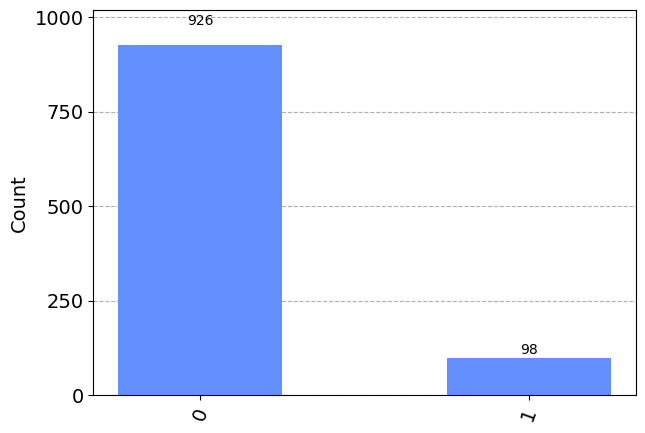

In [5]:
qc = QuantumCircuit(3, 1) #Circuito de 3 bits cuanticos.
qc.cx(0,1)
qc.cx(0,2)
qc.append(bitflip_gate, [0])
qc.measure([0],[0])

result = execute(qc, Aer.get_backend('qasm_simulator'),
                 noise_model=noise_model).result()


plot_histogram(result.get_counts(0))


Ahora aplicaremos el codigo de 3 qubits para corregir este error

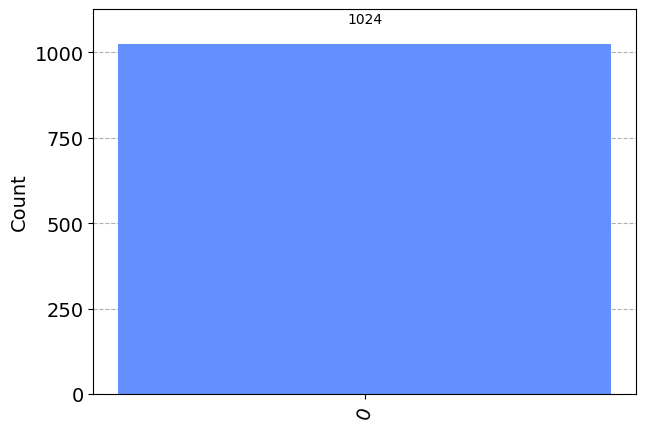

In [9]:
qc_corregido = QuantumCircuit(3, 1) #Circuito de 3 bits cuanticos.

qc_corregido.cx(0,1)
qc_corregido.cx(0,2)
qc_corregido.append(bitflip_gate, [0])
qc_corregido.cx(0,1)
qc_corregido.cx(0,2)
qc_corregido.ccx(2,1,0)
qc_corregido.measure([0],[0])

result_corregido = execute(qc_corregido, Aer.get_backend('qasm_simulator'),
                 noise_model=noise_model).result()


plot_histogram(result_corregido.get_counts(0))



